In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow import keras
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

2023-12-05 21:28:19.134514: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the augmented data from the saved file
data = np.load('/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Pickles/coral_augmented_mask.npz')

# Access the arrays from the loaded data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
X_valid = data['X_valid']
y_valid = data['y_valid']

# Print the shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7488, 224, 224, 3)
y_train shape: (7488, 224, 224)
X_valid shape: (1880, 224, 224, 3)
y_valid shape: (1880, 224, 224)
X_test shape: (2344, 224, 224, 3)
y_test shape: (2344, 224, 224)


In [3]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

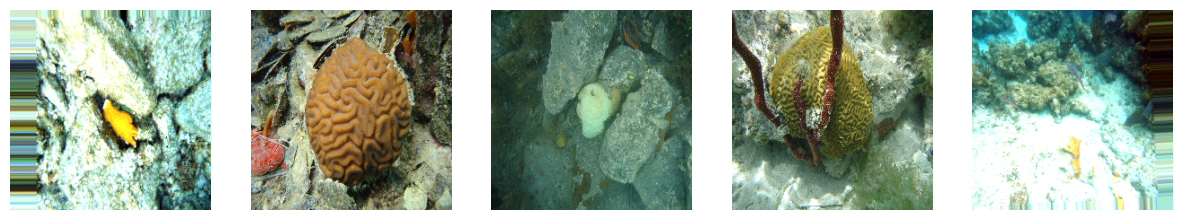

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of samples to display
num_samples_to_display = 5

# Create subplots to display the images
plt.figure(figsize=(15, 5))

for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    
    # Normalize pixel values to the range [0, 1]
    # Swap color channels to convert from BGR to RGB
    plt.imshow(np.flip(X_test[i], axis=-1))
    
    plt.axis("off")

plt.show()


In [86]:
# model = load_model('/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/models/coral_unet.h5')

In [87]:
# # Assuming you have a function for evaluating the model on your test data, you can use it here.
# # For example:
# evaluation_results = model.evaluate(X_test, y_test)

# # Assuming y_pred contains predicted masks for X_test
# predicted_masks = model.predict(X_test)

# # You can print or use the evaluation results as needed.
# print("Evaluation Results:", evaluation_results)


In [88]:
# # Assuming y_pred contains predicted masks for X_test
# predicted_masks_test = model.predict(X_test)

# predicted_masks_train = model.predict(X_train)

# predicted_masks_valid = model.predict(X_valid)

In [89]:
# import numpy as np

# # Convert predicted masks for X_test to NumPy array
# predicted_masks_test = np.array(predicted_masks_test)

# # Convert predicted masks for X_train to NumPy array
# predicted_masks_train = np.array(predicted_masks_train)

# # Convert predicted masks for X_valid to NumPy array
# predicted_masks_valid = np.array(predicted_masks_valid)


# # Remove singleton dimension from predicted masks for X_test
# predicted_masks_test = np.squeeze(predicted_masks_test, axis=-1)

# # Remove singleton dimension from predicted masks for X_train
# predicted_masks_train = np.squeeze(predicted_masks_train, axis=-1)

# # Remove singleton dimension from predicted masks for X_valid
# predicted_masks_valid = np.squeeze(predicted_masks_valid, axis=-1)


In [5]:
import pickle

try:
    with open('predicted_masks_test.pkl', 'rb') as file:
        predicted_masks_test = pickle.load(file)

    with open('predicted_masks_train.pkl', 'rb') as file:
        predicted_masks_train = pickle.load(file)

    with open('predicted_masks_valid.pkl', 'rb') as file:
        predicted_masks_valid = pickle.load(file)

except Exception as e:
    print(f"An error occurred: {e}")


In [6]:
# Check the shape of predicted masks for X_test
print("Shape of predicted_masks_test:", predicted_masks_test.shape)

# Check the shape of predicted masks for X_train
print("Shape of predicted_masks_train:", predicted_masks_train.shape)

# Check the shape of predicted masks for X_valid
print("Shape of predicted_masks_valid:", predicted_masks_valid.shape)




Shape of predicted_masks_test: (2344, 224, 224, 1)
Shape of predicted_masks_train: (7488, 224, 224, 1)
Shape of predicted_masks_valid: (1880, 224, 224, 1)


In [7]:
import numpy as np

# Threshold for binary mask
threshold = 0.5

# Thresholding and conversion to single-channel binary mask
binary_mask_test = (predicted_masks_test > threshold).astype(np.uint8)
binary_mask_train = (predicted_masks_train > threshold).astype(np.uint8)
binary_mask_valid = (predicted_masks_valid > threshold).astype(np.uint8)

# Ensure the shape is (num_samples, height, width)
binary_mask_test = binary_mask_test.squeeze(axis=-1)
binary_mask_train = binary_mask_train.squeeze(axis=-1)
binary_mask_valid = binary_mask_valid.squeeze(axis=-1)

# Check the new shapes
print("Shape of binary_mask_test:", binary_mask_test.shape)
print("Shape of binary_mask_train:", binary_mask_train.shape)
print("Shape of binary_mask_valid:", binary_mask_valid.shape)


Shape of binary_mask_test: (2344, 224, 224)
Shape of binary_mask_train: (7488, 224, 224)
Shape of binary_mask_valid: (1880, 224, 224)


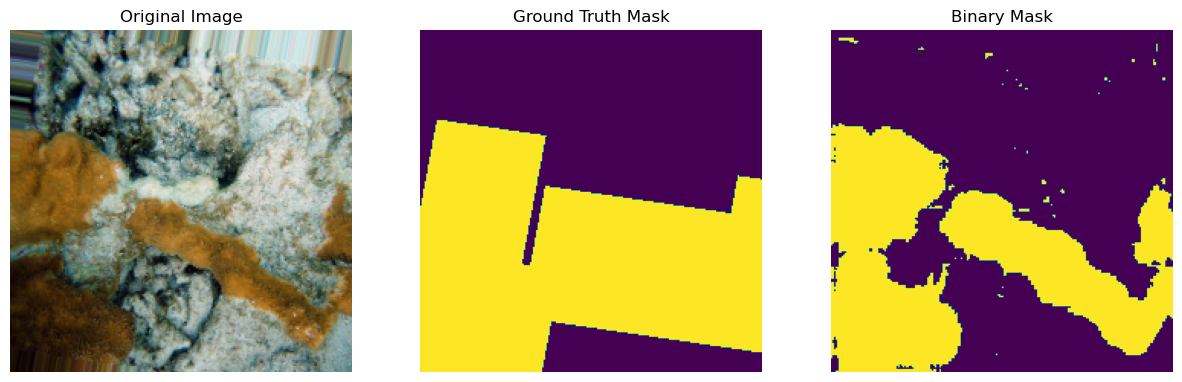

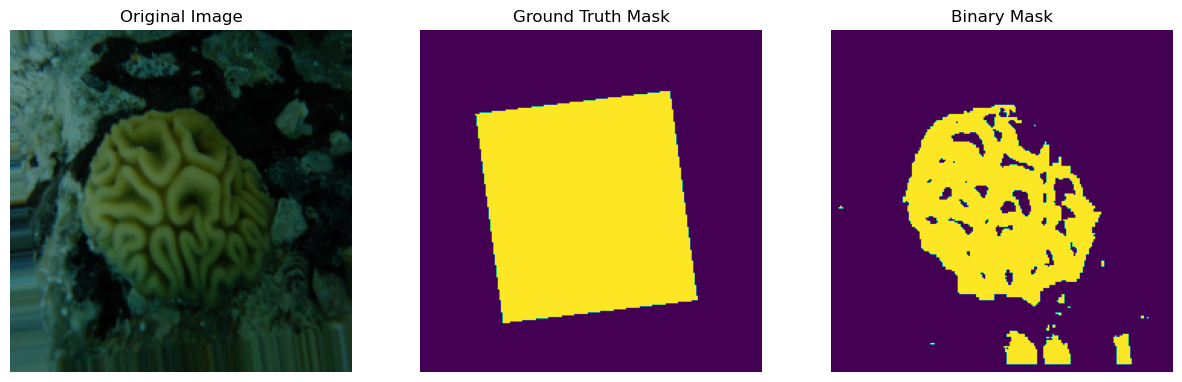

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Choose 5 random indices from X_train
num_images_to_display = 2
indices_to_display = np.random.choice(len(X_train), num_images_to_display, replace=False)

# Visualize the images, ground truth masks, and binary masks
for i in indices_to_display:
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(np.flip(X_train[i], axis=-1).astype(float))
    plt.title('Original Image')
    plt.axis('off')

    # Ground Truth Mask
    plt.subplot(1, 3, 2)
    plt.imshow(y_train[i])
    plt.title('Ground Truth Mask')
    plt.axis('off')

    # Binary Mask
    plt.subplot(1, 3, 3)
    plt.imshow(binary_mask_train[i])  # Assuming binary masks are single-channel
    plt.title('Binary Mask')
    plt.axis('off')

    plt.show()


In [9]:
import numpy as np

# Assuming you have ground truth masks for the train and valid sets
ground_truth_train = y_train  # Replace with actual ground truth for train set
ground_truth_valid = y_valid  # Replace with actual ground truth for valid set

# Ensure that the shapes are compatible
assert binary_mask_train.shape == ground_truth_train.shape, "Shapes of binary masks and ground truth masks do not match for train set."
assert binary_mask_valid.shape == ground_truth_valid.shape, "Shapes of binary masks and ground truth masks do not match for valid set."

# Compute IoU for each predicted mask in the train and valid sets
intersection_train = np.sum(np.logical_and(ground_truth_train, binary_mask_train), axis=(1, 2))
union_train = np.sum(np.logical_or(ground_truth_train, binary_mask_train), axis=(1, 2))
iou_train = intersection_train / (union_train + 1e-10)  # Adding a small epsilon to avoid division by zero

intersection_valid = np.sum(np.logical_and(ground_truth_valid, binary_mask_valid), axis=(1, 2))
union_valid = np.sum(np.logical_or(ground_truth_valid, binary_mask_valid), axis=(1, 2))
iou_valid = intersection_valid / (union_valid + 1e-10)  # Adding a small epsilon to avoid division by zero

# Set a threshold for IoU to determine well-performing masks
iou_threshold = 0.5

# Filter indices of well-performing masks
well_performing_train_indices = np.where(iou_train > iou_threshold)[0]
well_performing_valid_indices = np.where(iou_valid > iou_threshold)[0]

# Select only well-performing masks
well_performing_masks_train = binary_mask_train[well_performing_train_indices]
well_performing_masks_valid = binary_mask_valid[well_performing_valid_indices]

# Print shapes for verification
print("Shape of well_performing_masks_train:", well_performing_masks_train.shape)
print("Shape of well_performing_masks_valid:", well_performing_masks_valid.shape)


Shape of well_performing_masks_train: (3469, 224, 224)
Shape of well_performing_masks_valid: (850, 224, 224)


In [10]:
# Assuming you have ground truth masks for the train and valid sets
ground_truth_train = y_train  # Replace with actual ground truth for train set
ground_truth_valid = y_valid  # Replace with actual ground truth for valid set

# Ensure that the shapes are compatible
assert binary_mask_train.shape == ground_truth_train.shape, "Shapes of binary masks and ground truth masks do not match for train set."
assert binary_mask_valid.shape == ground_truth_valid.shape, "Shapes of binary masks and ground truth masks do not match for valid set."

# Compute IoU for each predicted mask in the train and valid sets
intersection_train = np.sum(np.logical_and(ground_truth_train, binary_mask_train), axis=(1, 2))
union_train = np.sum(np.logical_or(ground_truth_train, binary_mask_train), axis=(1, 2))
iou_train = intersection_train / (union_train + 1e-10)  # Adding a small epsilon to avoid division by zero

intersection_valid = np.sum(np.logical_and(ground_truth_valid, binary_mask_valid), axis=(1, 2))
union_valid = np.sum(np.logical_or(ground_truth_valid, binary_mask_valid), axis=(1, 2))
iou_valid = intersection_valid / (union_valid + 1e-10)  # Adding a small epsilon to avoid division by zero

# Set a threshold for IoU to determine well-performing masks
iou_threshold = 0.5

# Filter indices of well-performing masks
well_performing_train_indices = np.where(iou_train > iou_threshold)[0]
well_performing_valid_indices = np.where(iou_valid > iou_threshold)[0]

# Select only well-performing masks
well_performing_masks_train = binary_mask_train[well_performing_train_indices]
well_performing_masks_valid = binary_mask_valid[well_performing_valid_indices]

# Get corresponding X_train and X_valid
well_performing_X_train = X_train[well_performing_train_indices]
well_performing_X_valid = X_valid[well_performing_valid_indices]

# Print shapes for verification
print("Shape of well_performing_masks_train:", well_performing_masks_train.shape)
print("Shape of well_performing_masks_valid:", well_performing_masks_valid.shape)
print("Shape of well_performing_X_train:", well_performing_X_train.shape)
print("Shape of well_performing_X_valid:", well_performing_X_valid.shape)


Shape of well_performing_masks_train: (3469, 224, 224)
Shape of well_performing_masks_valid: (850, 224, 224)
Shape of well_performing_X_train: (3469, 224, 224, 3)
Shape of well_performing_X_valid: (850, 224, 224, 3)


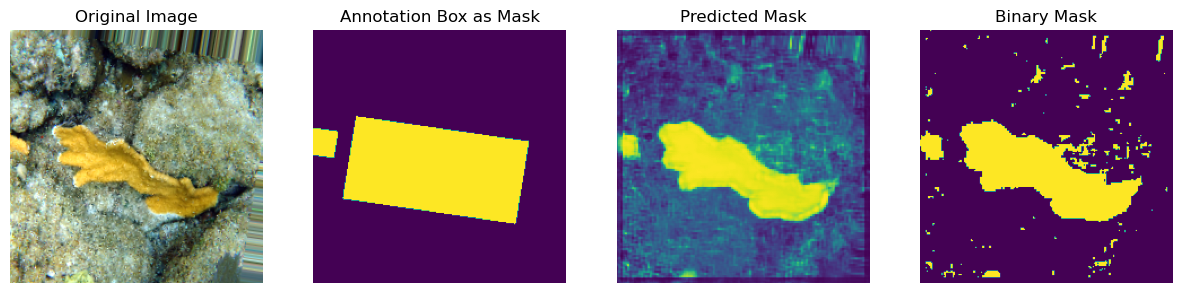

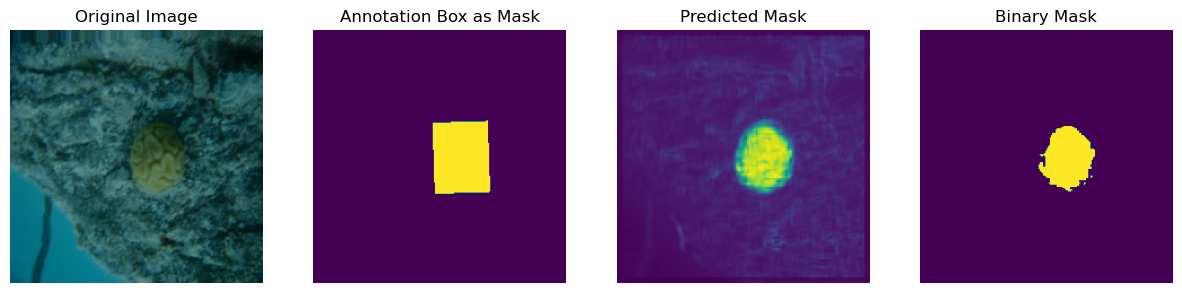

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Choose 5 random indices from the well-performing masks
num_images_to_display = 2
indices_to_display = np.random.choice(len(well_performing_masks_train), num_images_to_display, replace=False)

# Visualize the images, ground truth masks, predicted masks, and binary masks
for i in indices_to_display:
    plt.figure(figsize=(15, 5))

    # Original Image (X_train)
    plt.subplot(1, 4, 1)
    plt.imshow(np.flip(X_train[well_performing_train_indices[i]], axis=-1).astype(float))
    plt.title('Original Image')
    plt.axis('off')

    # Ground Truth Mask (y_train)
    plt.subplot(1, 4, 2)
    plt.imshow(y_train[well_performing_train_indices[i]])
    plt.title('Annotation Box as Mask')
    plt.axis('off')

    # Predicted Mask
    plt.subplot(1, 4, 3)
    plt.imshow(predicted_masks_train[well_performing_train_indices[i], :, :, 0], cmap='viridis')  # Adjust cmap as needed
    plt.title('Predicted Mask')
    plt.axis('off')

    # Binary Mask (Well-performing mask)
    plt.subplot(1, 4, 4)
    plt.imshow(well_performing_masks_train[i])
    plt.title('Binary Mask')
    plt.axis('off')

    plt.show()


## Train the models with predicted masks

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def simplified_unet(input_shape=(224, 224, 3)):
    inputs = Input(input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Bottleneck
    bottleneck = Conv2D(128, 3, activation='relu', padding='same')(pool1)

    # Expansive Path
    up1 = Concatenate()([UpSampling2D(size=(2, 2))(bottleneck), conv1])
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(up1)

    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(conv2)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the simplified U-Net model
model = simplified_unet()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 64  0           ['conv2d[0][0]']                 
                                )                                                             

2023-12-03 22:29:45.519858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
# Train the model
history = model.fit(well_performing_X_train, well_performing_masks_train, epochs=10, batch_size=32, validation_data=(well_performing_X_valid, well_performing_masks_valid))

Epoch 1/10
109/109 [==============================] - 1007s 9s/step - loss: 0.2342 - accuracy: 0.9110 - val_loss: 0.1574 - val_accuracy: 0.9442
Epoch 2/10
109/109 [==============================] - 966s 9s/step - loss: 0.1311 - accuracy: 0.9530 - val_loss: 0.1104 - val_accuracy: 0.9608
Epoch 3/10
109/109 [==============================] - 865s 8s/step - loss: 0.1000 - accuracy: 0.9626 - val_loss: 0.0880 - val_accuracy: 0.9673
Epoch 4/10
109/109 [==============================] - 875s 8s/step - loss: 0.0797 - accuracy: 0.9695 - val_loss: 0.0772 - val_accuracy: 0.9707
Epoch 5/10
109/109 [==============================] - 902s 8s/step - loss: 0.0674 - accuracy: 0.9736 - val_loss: 0.0600 - val_accuracy: 0.9772
Epoch 6/10
109/109 [==============================] - 825s 8s/step - loss: 0.0591 - accuracy: 0.9765 - val_loss: 0.0554 - val_accuracy: 0.9779
Epoch 7/10
109/109 [==============================] - 831s 8s/step - loss: 0.0503 - accuracy: 0.9800 - val_loss: 0.0487 - val_accuracy: 0.981

In [44]:
model.save('../models/coral_unet_pred.h5')

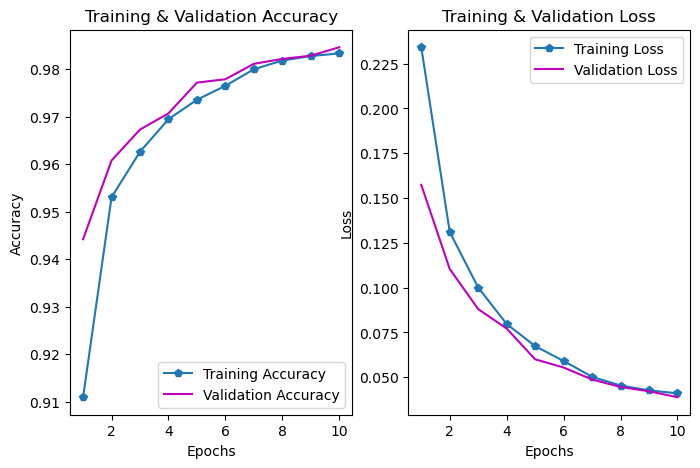

In [45]:
# Assuming you have already trained your model and have the `history` object
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 5)

# Extract training and validation accuracy from the history object
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy with purple markers and solid line
ax[0].plot(epochs, train_acc, 'p-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'm-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss with purple markers and solid line
ax[1].plot(epochs, train_loss, 'p-', label='Training Loss')
ax[1].plot(epochs, val_loss, 'm-', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()


In [28]:
model = load_model('../models/coral_unet_pred.h5')

2023-12-05 21:39:56.043577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# Assuming you have a function for evaluating the model on your test data, you can use it here.
# For example:
evaluation_results = model.evaluate(X_test, binary_mask_test)

# You can print or use the evaluation results as needed.
print("Evaluation Results:", evaluation_results)


74/74 [==============================] - 166s 2s/step - loss: 0.0487 - accuracy: 0.9805
Evaluation Results: [0.04868050664663315, 0.9805141091346741]


In [30]:
# Assuming y_pred contains predicted masks for X_test
predicted_masks_test2 = model.predict(X_test)

74/74 [==============================] - 166s 2s/step


In [31]:
predicted_masks_test22 = (predicted_masks_test2 > 0.5).astype(np.uint8)

predicted_masks_test23 = predicted_masks_test22.squeeze(axis=-1)
print("Shape of predicted mask23:", predicted_masks_test23.shape)

Shape of predicted mask23: (2344, 224, 224)


In [33]:

import numpy as np

def calculate_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    iou = intersection / union if union != 0 else 0
    return iou

iou_scores = []

for i in range(len(X_test)):
    iou = calculate_iou(binary_mask_test[i], predicted_masks_test23[i])
    iou_scores.append(iou)

average_iou = np.mean(iou_scores)

def calculate_pixel_accuracy(y_true, y_pred):
    correct_pixels = np.sum(y_true == y_pred)
    total_pixels = y_true.size
    accuracy = correct_pixels / total_pixels
    return accuracy

def calculate_dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred)
    dice_coefficient = (2.0 * intersection) / union if union != 0 else 0
    return dice_coefficient

# Calculate Pixel Accuracy and Dice Coefficient for each image
pixel_accuracy_scores = []
dice_coefficient_scores = []

for i in range(len(X_test)):
    # Flatten the masks to 1D arrays
    y_true_flat = binary_mask_test[i].flatten()
    y_pred_flat = predicted_masks_test23[i].flatten()

    # Calculate Pixel Accuracy
    pixel_accuracy = calculate_pixel_accuracy(y_true_flat, y_pred_flat)
    pixel_accuracy_scores.append(pixel_accuracy)

    # Calculate Dice Coefficient
    dice_coefficient = calculate_dice_coefficient(y_true_flat, y_pred_flat)
    dice_coefficient_scores.append(dice_coefficient)

# Calculate average Pixel Accuracy and Dice Coefficient
average_pixel_accuracy = np.mean(pixel_accuracy_scores)
average_dice_coefficient = np.mean(dice_coefficient_scores)

print(f"Average Pixel Accuracy: {average_pixel_accuracy}")
print(f"Average IoU: {average_iou}")
print(f"Average Dice Coefficient: {average_dice_coefficient}")



Average Pixel Accuracy: 0.980514085300289
Average IoU: 0.838842620235762
Average Dice Coefficient: 0.891045273886452


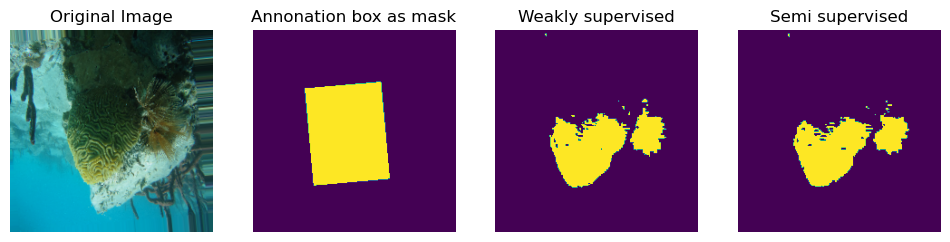

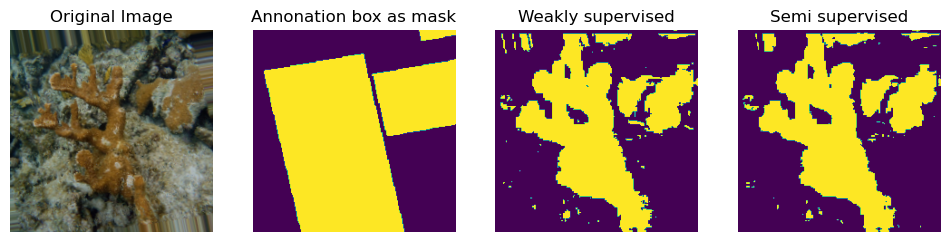

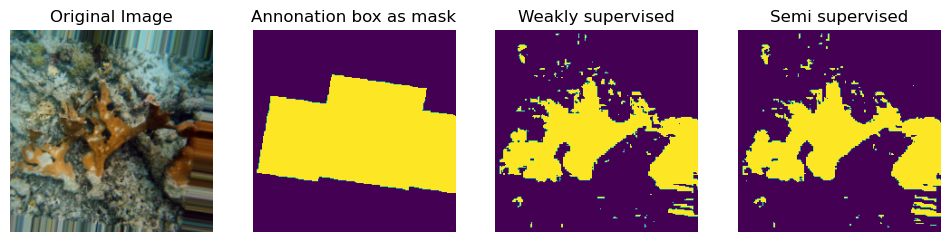

In [36]:
# Choose a few random images to visualize
num_images_to_visualize = 3
indices_to_visualize = np.random.choice(len(X_test), num_images_to_visualize, replace=False)

# Visualize the original image, ground truth mask, and predicted mask
for i in indices_to_visualize:
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 4, 1)
    plt.imshow(np.flip(X_test[i], axis=-1))
    plt.title('Original Image')
    plt.axis('off')


    # Annotation Mask
    plt.subplot(1, 4, 2)
    plt.imshow(y_test[i])  # Assuming binary_mask_test is a list of individual masks
    plt.title('Annonation box as mask')
    plt.axis('off')
    
    # Ground Truth Mask
    plt.subplot(1, 4, 3)
    plt.imshow(binary_mask_test[i])  # Assuming binary_mask_test is a list of individual masks
    plt.title('Weakly supervised')
    plt.axis('off')

    # Predicted Mask
    plt.subplot(1, 4, 4)
    predicted_mask = (predicted_masks_test23[i])
    plt.imshow(predicted_mask)
    plt.title('Semi supervised')
    plt.axis('off')

    plt.show()


## Testing on downloaded data

In [41]:
from PIL import Image
import os
import numpy as np

# Set the path to the directory containing your images
images_directory = "/Users/sumaiyauddin/Documents/Semester03/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/data/external/Coral_images/Test/images"

# List to store the loaded images
loaded_images = []

# Iterate over each file in the directory
for filename in os.listdir(images_directory):
    if filename.endswith(".jpg"):
        # Build the full path to the image
        image_path = os.path.join(images_directory, filename)

        # Open the image using PIL
        image = Image.open(image_path)

        # Convert the image to RGB format (if it's RGBA)
        if image.mode == 'RGBA':
            image = image.convert('RGB')

        # Resize the image to (224, 224)
        image = image.resize((224, 224))

        # Convert the image to a numpy array
        image_array = np.array(image)

        # Ensure the shape is (224, 224, 3)
        if image_array.shape == (224, 224, 3):
            # Append the image array to the list
            loaded_images.append(image_array)
        else:
            print(f"Resized {filename} to shape: {image_array.shape}")

# Convert the list of images to a numpy array
image_data = np.array(loaded_images)

# Print the shape of the loaded image data
print("Shape of loaded image data:", image_data.shape)


Shape of loaded image data: (51, 224, 224, 3)


In [42]:
# Assuming y_pred contains predicted masks for X_test
predicted_masks_test2 = model.predict(image_data)

2/2 [==============================] - 4s 1s/step


In [43]:
predicted_masks_test22 = (predicted_masks_test2 > 0.5).astype(np.uint8)

predicted_masks_test23 = predicted_masks_test22.squeeze(axis=-1)
print("Shape of predicted mask23:", predicted_masks_test23.shape)

Shape of predicted mask23: (51, 224, 224)


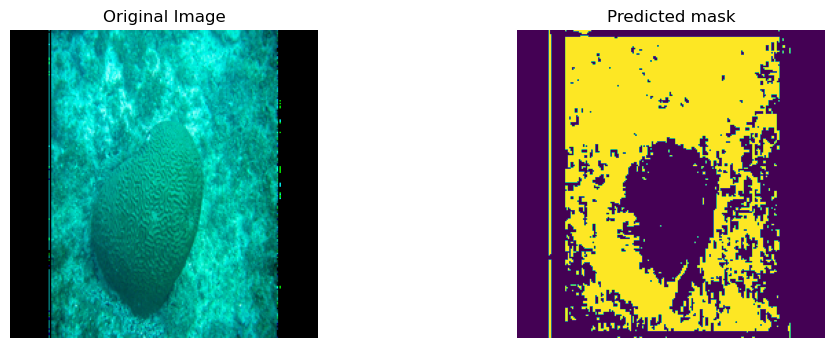

In [49]:
# Choose a few random images to visualize
num_images_to_visualize = 1
indices_to_visualize = np.random.choice(len(image_data), num_images_to_visualize, replace=False)

# Visualize the original image, ground truth mask, and predicted mask
for i in indices_to_visualize:
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image_data[i])
    plt.title('Original Image')
    plt.axis('off')


    # Annotation Mask
    plt.subplot(1, 2, 2)
    plt.imshow(predicted_masks_test23[i])  # Assuming binary_mask_test is a list of individual masks
    plt.title('Predicted mask')
    plt.axis('off')

    plt.show()


Average Pixel Accuracy: 0.980514085300289
Average Dice Coefficient: 0.891045273886452


### MobileNetV2

In [74]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load MobileNetV2 as the backbone
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False)

# Freeze the backbone layers
base_model.trainable = False

# Create a segmentation head
model = models.Sequential([
    base_model,
    layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=(2, 2)),
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2)),
    layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', strides=(8, 8))  # Adjust strides accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(well_performing_X_train, well_performing_masks_train, epochs=10, batch_size=32, validation_data=(well_performing_X_valid, well_performing_masks_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      1474688   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 64)       73792     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 224, 224, 1)      577       
 ranspose)                                                       
                                                                 
Total params: 3,807,041
Trainable params: 1,549,057
Non-

In [75]:
model.save('../models/coral_mobilenet_pred.h5')

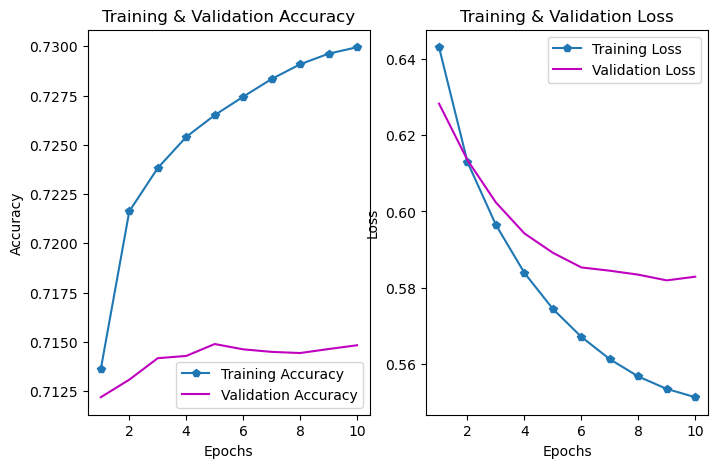

In [76]:
# Assuming you have already trained your model and have the `history` object
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 5)

# Extract training and validation accuracy from the history object
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy with purple markers and solid line
ax[0].plot(epochs, train_acc, 'p-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'm-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss with purple markers and solid line
ax[1].plot(epochs, train_loss, 'p-', label='Training Loss')
ax[1].plot(epochs, val_loss, 'm-', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()


In [51]:
model = load_model('../models/coral_mobilenet_pred.h5')

In [52]:
# Assuming you have a function for evaluating the model on your test data, you can use it here.
# For example:
evaluation_results = model.evaluate(X_test, binary_mask_test)

# You can print or use the evaluation results as needed.
print("Evaluation Results:", evaluation_results)


74/74 [==============================] - 23s 308ms/step - loss: 0.5372 - accuracy: 0.7923
Evaluation Results: [0.5372398495674133, 0.7922892570495605]


In [53]:
# Assuming y_pred contains predicted masks for X_test
predicted_masks_test2 = model.predict(X_test)

74/74 [==============================] - 23s 311ms/step


In [54]:
predicted_masks_test22 = (predicted_masks_test2 > 0.5).astype(np.uint8)

predicted_masks_test23 = predicted_masks_test22.squeeze(axis=-1)
print("Shape of predicted mask23:", predicted_masks_test23.shape)

Shape of predicted mask23: (2344, 224, 224)


In [55]:

import numpy as np

def calculate_iou(y_true, y_pred):
    intersection = np.sum(np.logical_and(y_true, y_pred))
    union = np.sum(np.logical_or(y_true, y_pred))
    iou = intersection / union if union != 0 else 0
    return iou

iou_scores = []

for i in range(len(X_test)):
    iou = calculate_iou(binary_mask_test[i], predicted_masks_test23[i])
    iou_scores.append(iou)

average_iou = np.mean(iou_scores)

def calculate_pixel_accuracy(y_true, y_pred):
    correct_pixels = np.sum(y_true == y_pred)
    total_pixels = y_true.size
    accuracy = correct_pixels / total_pixels
    return accuracy

def calculate_dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred)
    dice_coefficient = (2.0 * intersection) / union if union != 0 else 0
    return dice_coefficient

# Calculate Pixel Accuracy and Dice Coefficient for each image
pixel_accuracy_scores = []
dice_coefficient_scores = []

for i in range(len(X_test)):
    # Flatten the masks to 1D arrays
    y_true_flat = binary_mask_test[i].flatten()
    y_pred_flat = predicted_masks_test23[i].flatten()

    # Calculate Pixel Accuracy
    pixel_accuracy = calculate_pixel_accuracy(y_true_flat, y_pred_flat)
    pixel_accuracy_scores.append(pixel_accuracy)

    # Calculate Dice Coefficient
    dice_coefficient = calculate_dice_coefficient(y_true_flat, y_pred_flat)
    dice_coefficient_scores.append(dice_coefficient)

# Calculate average Pixel Accuracy and Dice Coefficient
average_pixel_accuracy = np.mean(pixel_accuracy_scores)
average_dice_coefficient = np.mean(dice_coefficient_scores)

print(f"Average Pixel Accuracy: {average_pixel_accuracy}")
print(f"Average IoU: {average_iou}")
print(f"Average Dice Coefficient: {average_dice_coefficient}")



Average Pixel Accuracy: 0.7922891541228799
Average IoU: 0.07012708764212258
Average Dice Coefficient: 0.12859765176108615


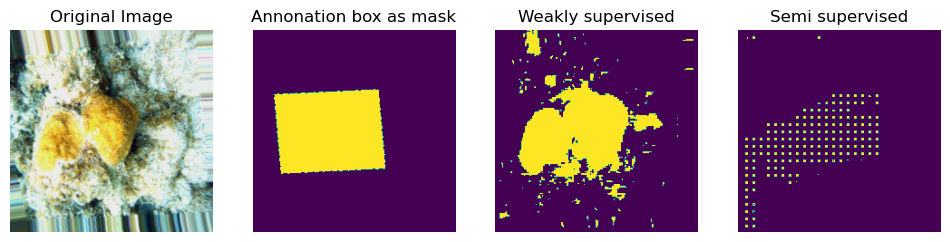

In [56]:
# Choose a few random images to visualize
num_images_to_visualize = 1
indices_to_visualize = np.random.choice(len(X_test), num_images_to_visualize, replace=False)

# Visualize the original image, ground truth mask, and predicted mask
for i in indices_to_visualize:
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 4, 1)
    plt.imshow(np.flip(X_test[i], axis=-1))
    plt.title('Original Image')
    plt.axis('off')


    # Annotation Mask
    plt.subplot(1, 4, 2)
    plt.imshow(y_test[i])  # Assuming binary_mask_test is a list of individual masks
    plt.title('Annonation box as mask')
    plt.axis('off')
    
    # Ground Truth Mask
    plt.subplot(1, 4, 3)
    plt.imshow(binary_mask_test[i])  # Assuming binary_mask_test is a list of individual masks
    plt.title('Weakly supervised')
    plt.axis('off')

    # Predicted Mask
    plt.subplot(1, 4, 4)
    predicted_mask = (predicted_masks_test23[i])
    plt.imshow(predicted_mask)
    plt.title('Semi supervised')
    plt.axis('off')

    plt.show()
